### Revenue Forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from pandas import to_datetime
from fbprophet import Prophet
import warnings; 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("fake_clinic_data_extract_test.csv")
df.head()

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,2021-12-30,clinic_2,70172,1030,30,98.13
1,2021-12-29,clinic_1,53371,756,15,65.13
2,2021-12-29,clinic_2,69545,1030,30,105.18
3,2021-12-27,clinic_1,43859,756,30,58.11
4,2021-12-23,clinic_1,69303,756,30,119.00


### Understanding the Data Types and Entries

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   appointment_date           4071 non-null   object 
 1   clinic_name                4071 non-null   object 
 2   patient_id                 4071 non-null   int64  
 3   practitioner_id            4071 non-null   int64  
 4   appointment_duration_min   4071 non-null   int64  
 5   revenues_from_appointment  3696 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 191.0+ KB


In [4]:
df.describe()

,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
count,4071.000000,4071.000000,4071.000000,3696.000000
mean,50352.166789,766.627364,42.246377,160.864115
std,7371.897408,64.550564,28.539519,245.706333
min,42127.000000,741.000000,15.000000,33.540000
25%,44646.000000,742.000000,30.000000,72.160000
50%,47388.000000,755.000000,30.000000,104.470000
75%,53373.000000,756.000000,60.000000,161.630000
max,70307.000000,1030.000000,330.000000,5655.920000


In [5]:
df.shape     #The Data Frame has 4071 Rows and 6 Columns

(4071, 6)

In [6]:
df["clinic_name"].unique()  # Number of unique clinics that patients pay's visit

array(['clinic_2', 'clinic_1'], dtype=object)

In [7]:
df.groupby("clinic_name").mean().head(5)

,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
clinic_name,,,,
clinic_1,48905.140799,755.923425,41.535611,137.184822
clinic_2,52492.742996,782.461632,43.297808,197.459387


In [8]:
df.groupby(["clinic_name", "appointment_date"]).agg({"revenues_from_appointment":"mean","patient_id":"count"})

revenues_from_appointment  patient_id
clinic_name appointment_date                                       
clinic_1    2021-07-07                       130.475000           4
            2021-07-08                       150.174286           8
            2021-07-09                       101.121429           7
            2021-07-12                       178.963158          20
            2021-07-13                       111.310000          12
...                                                 ...         ...
clinic_2    2021-12-23                       197.284118          17
            2021-12-27                       140.678182          12
            2021-12-28                       145.580000          14
            2021-12-29                       140.366923          14
            2021-12-30                       109.973750          11

[251 rows x 2 columns]

In [9]:
df.pivot_table(index="clinic_name", values="revenues_from_appointment", aggfunc=[np.mean, np.std, np.median])

,mean,std,median
,revenues_from_appointment,revenues_from_appointment,revenues_from_appointment
clinic_name,,,
clinic_1,137.184822,230.979795,90.9
clinic_2,197.459387,262.788045,120.5


In [10]:
df.pivot_table(index=["patient_id","practitioner_id"], columns="clinic_name")

appointment_duration_min           \
clinic_name                                clinic_1 clinic_2   
patient_id practitioner_id                                     
42127      741                                  NaN     40.0   
           742                                  NaN     60.0   
42141      741                                  NaN     37.5   
           742                                  NaN     60.0   
42146      748                                  NaN     30.0   
...                                             ...      ...   
70138      1030                                 NaN     30.0   
70172      1030                                 NaN     30.0   
70215      1030                                 NaN     30.0   
70262      1030                                 NaN     30.0   
70307      1030                                 NaN     45.0   

                           revenues_from_appointment              
clinic_name                                 clinic_1    clinic_2  
patient_id practitioner_id                                        
42127      741                                   NaN  198.354286  
           742                                   NaN         NaN  
42141      741                                   NaN  154.155000  
           742                                   NaN         NaN  
42146      748                                   NaN   87.280000  
...                                              ...         ...  
70138      1030                                  NaN   98.130000  
70172      1030                                  NaN   98.130000  
70215      1030                                  NaN  120.450000  
70262      1030                                  NaN  125.150000  
70307      1030                                  NaN  114.580000  

[2448 rows x 4 columns]

In [11]:
df1= df.groupby(["appointment_date"]).agg({"revenues_from_appointment":"mean","appointment_duration_min":"count"}).reset_index()
df1

,appointment_date,revenues_from_appointment,appointment_duration_min
0,2021-06-28,108.169333,15
1,2021-06-29,157.955000,7
2,2021-06-30,148.540000,6
3,2021-07-01,88.732000,5
4,2021-07-02,110.887500,4
...,...,...,...
127,2021-12-23,227.426316,44
128,2021-12-27,117.648462,28
129,2021-12-28,137.321765,35
130,2021-12-29,108.974828,30


<AxesSubplot:>

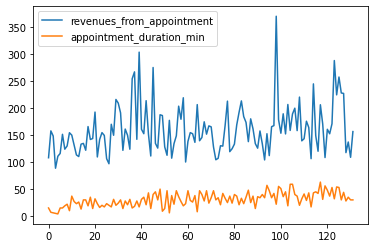

In [12]:
df1.plot()

### Note:
#### For Prediction of revenue the time-line and the Revenue are the point of focus so i am seperating only two focused colums for our further work . I am Replacing all Null values with 0 to overcome outliers. 

In [13]:
df = df.loc[:,('appointment_date', 'revenues_from_appointment')].fillna(0)  # Replacing Null values with 0 to overcome outliers issue
#pd.set_option("max_rows", None)
df.head()

,appointment_date,revenues_from_appointment
0,2021-12-30,98.13
1,2021-12-29,65.13
2,2021-12-29,105.18
3,2021-12-27,58.11
4,2021-12-23,119.00


#### Here i am using fbprophet module which is a strong module to predict future values to make it simple and based on that the model data frame has to be always having colums 'ds' and 'y' to fit in the model. so i have renamed the colums accordingly

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2022-01-01  154.950432 -139.077383  472.314251
1 2022-02-01  169.390740 -136.586156  482.590676
2 2022-03-01  177.197185 -132.777159  489.576435
3 2022-04-01  210.212322 -100.592755  496.664129
4 2022-05-01  188.406625 -110.682620  523.922691
5 2022-06-01  212.073893  -83.685034  544.155583
6 2022-07-01  235.583268  -77.229902  557.383933
7 2022-08-01  228.333910  -87.369739  538.671159
8 2022-09-01  236.636626  -91.861262  552.057843
9 2022-10-01  231.063270 -120.467620  551.215985


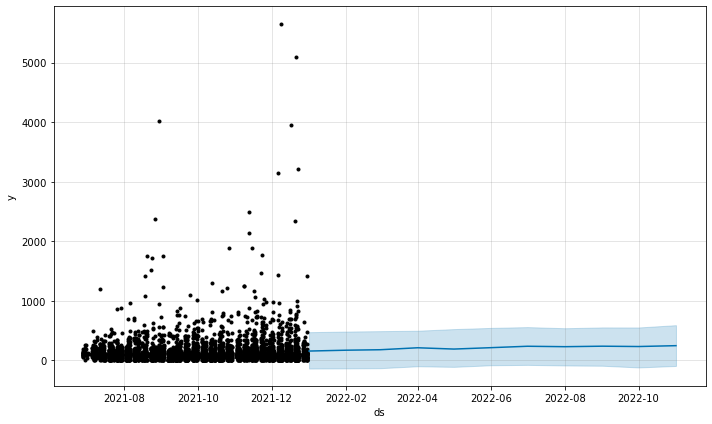

In [14]:
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# Define the model
model = Prophet()
# Fit the model
model.fit(df)
# Define the period for which we want a prediction
future = list()
for i in range(1, 12):
    date = '2022-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))
# plot forecast
model.plot(forecast)
pyplot.show()


## Conclusion:
### I have performed revenue prediction and tried to plot the graph. I have observed here that my model is not predecting the future revenue as i thought. Becuase prediction graph until 2022 shows that the average value of the revenue below 1000 euros every month. But abolutely its performing better becuase the mean is almost same for the trained data.